# Statistical Testing

In [55]:
import seaborn as sns
import os
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn
import pingouin as pg

pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.width', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Allow full width of display
import plotly.graph_objs as go
from matplotlib.dates import DateFormatter


In [4]:
sys.path

['/Users/emilyli/opt/anaconda3/lib/python39.zip',
 '/Users/emilyli/opt/anaconda3/lib/python3.9',
 '/Users/emilyli/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/emilyli/eli_py39/lib/python3.9/site-packages']

In [7]:
os.chdir('/Users/emilyli/workspace/datasets/')

In [12]:
# df.columns


In [19]:
df.head()

id  sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm      species   
0   1            5.1           3.5            1.4           0.2  Iris-setosa  \
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   sepal_width  
0          3.5  
1          3.0  
2          3.2  
3          3.1  
4          3.6

In [22]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [24]:
# import the data
df= pd.read_csv("Iris.csv")
df.columns = df.columns.str.lower()
df['sepal_width'] = df['sepalwidthcm']
# df[''] = df['petallengthcm']
# df[''] = df['petalwidthcm']
# df[''] = df['sepallengthcm']



setosa = df[(df['species'] == 'Iris-setosa')]
versicolor = df[(df['species'] == 'Iris-versicolor')]
virginica = df[(df['species'] == 'Iris-virginica')]

# homogeneity of variance
# Homogeneity of variance test:
# Null hypothesis (H0): The variances of the groups are equal (homogeneity of variance).
# Alternative hypothesis (H1): The variances of the groups are not equal (heterogeneity of variance).

stats.levene(setosa['sepal_width'], versicolor['sepal_width'])


LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

In [61]:
major_job_titles_df.head()

job_title experience_level employment_type work_models  work_year   
0   Data Engineer        Mid-level       Full-time      Remote       2024  \
1   Data Engineer        Mid-level       Full-time      Remote       2024   
2  Data Scientist     Senior-level       Full-time      Remote       2024   
3  Data Scientist     Senior-level       Full-time      Remote       2024   
4    BI Developer        Mid-level       Full-time     On-site       2024   

  employee_residence  salary salary_currency  salary_in_usd company_location   
0      United States  148100             USD         148100    United States  \
1      United States   98700             USD          98700    United States   
2      United States  140032             USD         140032    United States   
3      United States  100022             USD         100022    United States   
4      United States  120000             USD         120000    United States   

  company_size  
0       Medium  
1       Medium  
2       Medium  
3       Medium  
4       Medium

In [68]:
df2= pd.read_csv("data_science_salaries.csv")

value_counts = df2['job_title'].value_counts()
filtered_counts = value_counts[value_counts >= 30]
filtered_counts
major_job_titles = filtered_counts.index.tolist()
# major_job_titles = [x.lower() for x in major_job_titles]
major_job_titles_df = df2[df2['job_title'].isin(major_job_titles)]

major_job_titles2 = [x for x in major_job_titles if 'scientist' in x.lower() or 'ml' in x.lower() or 'machine learning' in x.lower() ]
major_job_titles_df2 = df2[df2['job_title'].isin(major_job_titles2)]

In [43]:
df_num = df.select_dtypes(include=['number'])
df_num.corr()


id  sepallengthcm  sepalwidthcm  petallengthcm   
id             1.000000       0.716676     -0.397729       0.882747  \
sepallengthcm  0.716676       1.000000     -0.109369       0.871754   
sepalwidthcm  -0.397729      -0.109369      1.000000      -0.420516   
petallengthcm  0.882747       0.871754     -0.420516       1.000000   
petalwidthcm   0.899759       0.817954     -0.356544       0.962757   
sepal_width   -0.397729      -0.109369      1.000000      -0.420516   

               petalwidthcm  sepal_width  
id                 0.899759    -0.397729  
sepallengthcm      0.817954    -0.109369  
sepalwidthcm      -0.356544     1.000000  
petallengthcm      0.962757    -0.420516  
petalwidthcm       1.000000    -0.356544  
sepal_width       -0.356544     1.000000

In [44]:
# sns.pairplot(data=df, height = 1.5)



In [25]:
stats.levene(virginica['sepal_width'], versicolor['sepal_width'])


LeveneResult(statistic=0.08726625111308971, pvalue=0.7683067284841042)

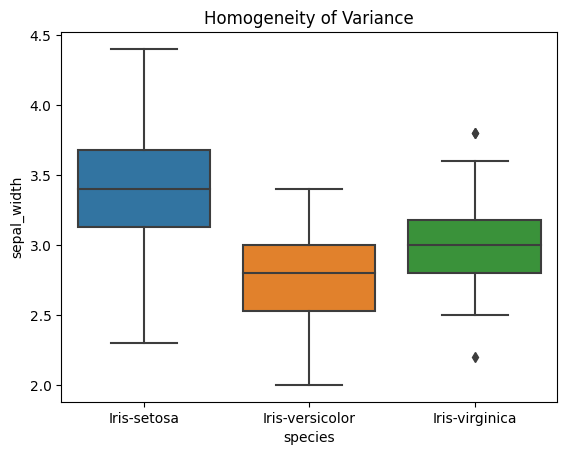

In [28]:
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Homogeneity of Variance')
plt.show()


In [29]:
# Shapiro-Wilk test for normality

# Normality test:
# Null hypothesis (H0): The data follows a normal distribution.
# Alternative hypothesis (H1): The data does not follow a normal distribution.
# Shapiro-Wilk test, Kolmogorov-Smirnov test, or Anderson-Darling test are often used to assess whether the data significantly deviates 
# from a normal distribution. If the p-value from these tests is less than a chosen significance level (often denoted as α), the null hypothesis 
# of normality is rejected, indicating that there is evidence to suggest that the data does not follow a normal distribution.
stats.shapiro(setosa['sepal_width'])


ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)

In [17]:
stats.shapiro(versicolor['sepal_width'])

ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)

In [47]:
# independent t-test - parametric
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])



Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [48]:

# independent t-test - nonparametric
stats.wilcoxon(setosa['sepal_width'], versicolor['sepal_width'])


WilcoxonResult(statistic=34.0, pvalue=3.0906620533922174e-08)

In [52]:
df2.head()

job_title experience_level employment_type work_models  work_year   
0   Data Engineer        Mid-level       Full-time      Remote       2024  \
1   Data Engineer        Mid-level       Full-time      Remote       2024   
2  Data Scientist     Senior-level       Full-time      Remote       2024   
3  Data Scientist     Senior-level       Full-time      Remote       2024   
4    BI Developer        Mid-level       Full-time     On-site       2024   

  employee_residence  salary salary_currency  salary_in_usd company_location   
0      United States  148100             USD         148100    United States  \
1      United States   98700             USD          98700    United States   
2      United States  140032             USD         140032    United States   
3      United States  100022             USD         100022    United States   
4      United States  120000             USD         120000    United States   

  company_size  
0       Medium  
1       Medium  
2       Medium  
3       Medium  
4       Medium

In [56]:
# anova test
# Run the ANOVA
aov = pg.anova(data=df2, dv='salary_in_usd', between='experience_level', detailed=True)
print(aov)

             Source            SS    DF            MS           F   
0  experience_level  4.903548e+12     3  1.634516e+12  380.809147  \
1            Within  2.830718e+13  6595  4.292218e+09         NaN   

           p-unc      np2  
0  4.075129e-228  0.14765  
1            NaN      NaN  


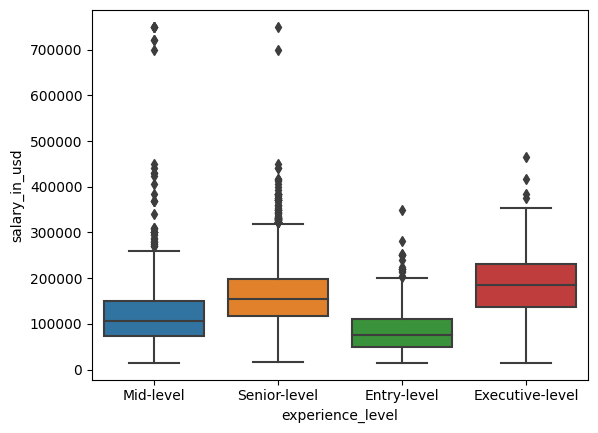

In [54]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df2)
plt.show()

In [66]:
aov = pg.anova(data=major_job_titles_df, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

      Source            SS    DF            MS          F          p-unc   
0  job_title  3.977610e+12    23  1.729396e+11  40.582783  2.241978e-168  \
1     Within  2.471187e+13  5799  4.261403e+09        NaN            NaN   

        np2  
0  0.138643  
1       NaN  


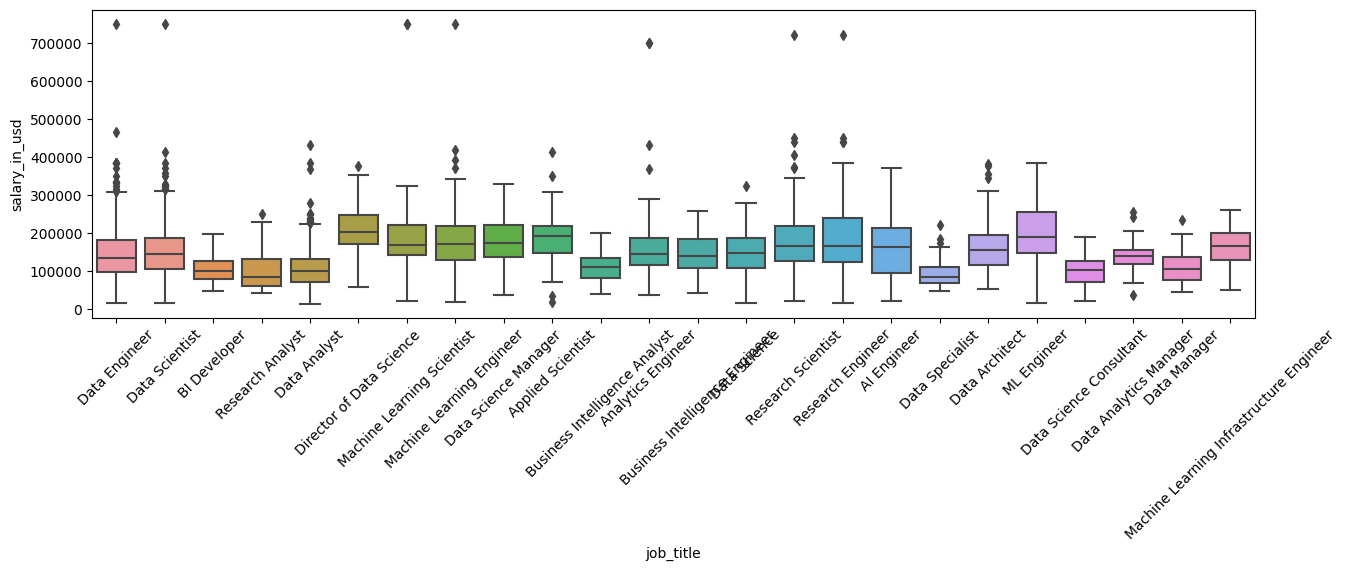

In [71]:
plt.figure(figsize=(15, 4)) 

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df)
plt.xticks(rotation=45)

plt.show()

In [79]:

aov = pg.anova(data=major_job_titles_df2, dv='salary_in_usd', between='job_title', detailed=True)
print(aov)

      Source            SS    DF            MS         F         p-unc   
0  job_title  7.064558e+11     6  1.177426e+11  23.26564  7.803177e-27  \
1     Within  1.206999e+13  2385  5.060794e+09       NaN           NaN   

        np2  
0  0.055294  
1       NaN  


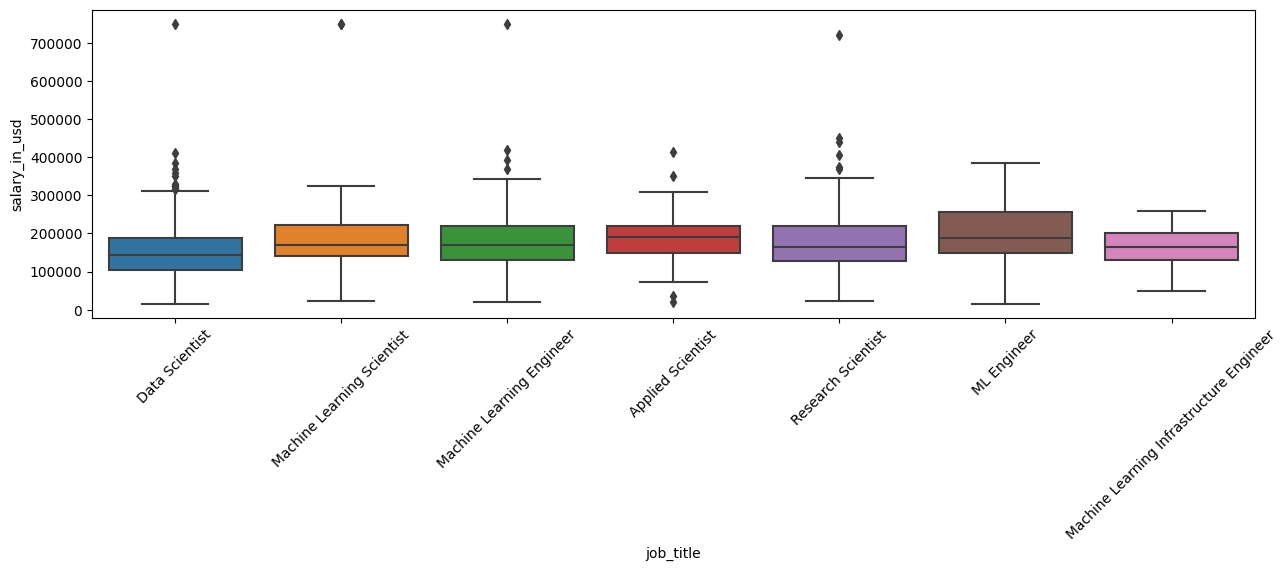

In [82]:

plt.figure(figsize=(15, 4)) 

sns.boxplot(x='job_title', y='salary_in_usd', data=major_job_titles_df2)
plt.xticks(rotation=45)
# plt.yscale('log')

plt.show()


In [99]:
# pairwise t-test to check which ones are stat significance after a significant anova
# pair : same subjects are measured under different conditions (true), False otherwise
# Parametric:Parametric tests assume that the data come from a normally distributed population with equal variances.
# 'p-unc' column: Contains the uncorrected p-value for the T-test.
# Hedges';  effect size estimate for the comparison. g, a measure of the standardized mean difference between the groups. Positive values indicate that the first group has higher means,
# Hedges: while negative values indicate that the second group has higher means
# BF10; Bayes Factor quantifies the evidence for the alternative hypothesis relative to the null hypothesis. Values greater than 1 indicate evidence for
# BF10; the alternative hypothesis, while values less than 1 indicate evidence for the null hypothesis..
# alternative: the test considers the possibility of differences in both directions. (two-sided)
results = pg.pairwise_tests(data=major_job_titles_df2, dv='salary_in_usd', between='job_title')
stat_significant_threshold = 0.05
results['stat_significant'] = np.where(results['p-unc']<= stat_significant_threshold,1,0) 
results['BF10'] = results['BF10'].astype(float)
results['test_favor'] = np.where(results['BF10']<= 1,'H1','H0') 

results[results['stat_significant'] == 1].sort_values(by = 'stat_significant', ascending = False)
# results.sort_values(by = 'stat_significant', ascending = False)


Contrast                  A                                         B   
0   job_title  Applied Scientist                            Data Scientist  \
2   job_title  Applied Scientist                 Machine Learning Engineer   
3   job_title  Applied Scientist  Machine Learning Infrastructure Engineer   
6   job_title     Data Scientist                               ML Engineer   
7   job_title     Data Scientist                 Machine Learning Engineer   
9   job_title     Data Scientist                Machine Learning Scientist   
10  job_title     Data Scientist                        Research Scientist   
11  job_title        ML Engineer                 Machine Learning Engineer   
12  job_title        ML Engineer  Machine Learning Infrastructure Engineer   

    Paired  Parametric         T          dof alternative         p-unc   
0    False        True  6.765206   116.237697   two-sided  5.677613e-10  \
2    False        True  2.056353   147.336302   two-sided  4.151293e-02   
3    False        True  2.439311    52.966813   two-sided  1.809833e-02   
6    False        True -6.402502   126.389224   two-sided  2.730955e-09   
7    False        True -8.175295  1153.424238   two-sided  7.710703e-16   
9    False        True -3.433227    75.043322   two-sided  9.740145e-04   
10   False        True -5.129474   249.709500   two-sided  5.835169e-07   
11   False        True  2.625270   147.916406   two-sided  9.567766e-03   
12   False        True  2.874237    68.164609   two-sided  5.397250e-03   

            BF10    hedges  stat_significant test_favor  
0   3.588000e+08  0.638960                 1         H0  
2   9.110000e-01  0.189488                 1         H1  
3   2.918000e+00  0.486952                 1         H0  
6   3.721000e+07 -0.734732                 1         H0  
7   7.741000e+12 -0.413503                 1         H0  
9   3.590300e+01 -0.648419                 1         H0  
10  3.029000e+04 -0.454018                 1         H0  
11  3.098000e+00  0.284283                 1         H0  
12  7.929000e+00  0.472597                 1         H0

In [97]:
results['BF10'].astype(float)



0     3.588000e+08
1     2.030000e-01
2     9.110000e-01
3     2.918000e+00
4     1.710000e-01
5     2.970000e-01
6     3.721000e+07
7     7.741000e+12
8     4.480000e-01
9     3.590300e+01
10    3.029000e+04
11    3.098000e+00
12    7.929000e+00
13    1.700000e-01
14    7.510000e-01
15    4.810000e-01
16    2.840000e-01
17    9.800000e-02
18    1.098000e+00
19    5.730000e-01
20    2.300000e-01
Name: BF10, dtype: float64